# Turing without space


In this section we will start modeling.
First thing first let's get ride of space and just look at how the ligands behaves when there is no diffusion

## No space and one ligand


Using the class scaffold below (or another one if you prefer), create a class that models the activator equation in one cell (so without diffusion) and without any inhibitor, in other words, [1] becomes:

$$\frac{\delta a}{\delta t} = a - a^3 + k$$

Once instantiated, the class should have a `run` method that runs the model until time `T` with the $\delta t$ specified by `dt`.

Each steps of the run should be stored in a 1 dimensional `np.ndarray` named `A`.

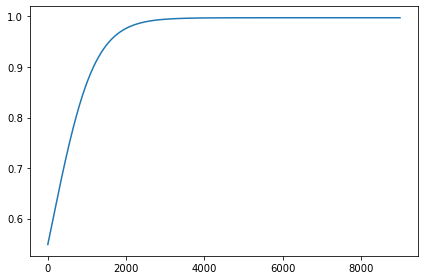

In [35]:
from turing_models import TuringInit
import numpy as np


class Turing(TuringInit):
    def reaction_A(self, a):
        return a - a**3 + self.k

    def run(self):
        for t in range(self.n-1):
            a = self.A[t]
            self.A[t+1] = a + self.dt * self.reaction_A(a)

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        np.random.seed(0)
        self.A = np.zeros(self.n)
        self.A[0] = np.random.random()


model = Turing()
model.run()
model.plot_reactions()

## No space, and 2 independent ligands

Using the class scaffold below (or another one if you prefer), create a class that models the activator and inhibitor equations in one cell (so without diffusion) such that they are independent from each others.
In other words, [1] becomes:

$$\frac{\delta a}{\delta t} = a - a^3 + k$$

and [2] becomes:

$$\tau \frac{\delta i}{\delta t} = - i$$

Once instantiated, the class should have a `run` method that runs the model until time `T` with the $\delta t$ specified by `dt`.

Each steps of the run should be stored in two 1 dimensional `ndarray`s named `A` and `I`.

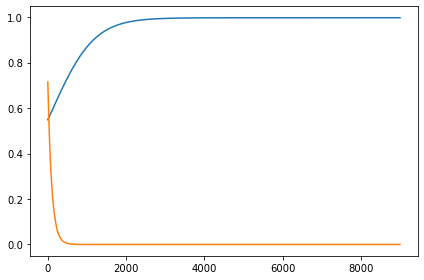

In [39]:
from turing_models import TuringInit
import numpy as np


class Turing(TuringInit):
    def reaction_A(self, a):
        return a - a**3 + self.k
    
    def reaction_I(self, i):
        return -i

    def run(self):
        for t in range(self.n-1):
            a = self.A[t]
            i = self.I[t]
            self.A[t+1] = a + self.dt * self.reaction_A(a)
            self.I[t+1] = i + self.dt/self.tau * self.reaction_I(i)

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        np.random.seed(0)
        self.A = np.zeros(self.n)
        self.A[0] = np.random.random()
        self.I = np.zeros(self.n)
        self.I[0] = np.random.random()


model = Turing()
model.run()
model.plot_reactions()

## No space and two interdependent ligands

Using the class scaffold below (or another one if you prefer), create a class that models the activator and inhibitor equations in one cell (so without diffusion) such that they are dependent from each others.
In other words, [1] becomes:

$$\frac{\delta a}{\delta t} = a - a^3 - i + k$$

and [2] becomes:

$$\tau \frac{\delta i}{\delta t} = a - i$$

Once instantiated, the class should have a `run` method that runs the model until time `T` with the $\delta t$ specified by `dt`.

Each steps of the run should be stored in two `ndarray`s named `A` and `I`.

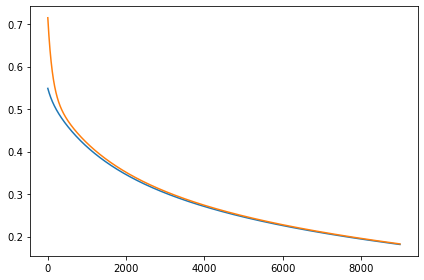

In [40]:
from turing_models import TuringInit
import numpy as np


class Turing(TuringInit):
    def reaction_A(self, a, i):
        return a - a**3 - i + self.k
    
    def reaction_I(self, a, i):
        return a - i

    def run(self):
        for t in range(self.n-1):
            a = self.A[t]
            i = self.I[t]
            self.A[t+1] = a + self.dt * self.reaction_A(a, i)
            self.I[t+1] = i + self.dt/self.tau * self.reaction_I(a, i)

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        np.random.seed(0)
        self.A = np.zeros(self.n)
        self.A[0] = np.random.random()
        self.I = np.zeros(self.n)
        self.I[0] = np.random.random()


model = Turing()
model.run()
model.plot_reactions()

[To the next notebook](6.Modeling_diffusion.ipynb)